# User set : 
### `BaseDir`, `ProblemDir`, `OptionDir`', `FileIndex` ,`nSpecies`
and `Filenamebase` if needed

In [1]:
%matplotlib notebook
## inline, notebook, or nbagg

Dir    = '/Users/ranchu/FLASHOR/FLASH5/onlyOpacity' 

FileIndex       = ['EmAb'] # need to be a list
nSpecies        = 2

fnum = len(FileIndex)
Directory     = [Dir] # can be different for a list
Directory     = Directory * len(FileIndex)
ProfileName   = 'Chimera_S25_100ms'
FullFileNames = ['?']*fnum
for i in range(fnum):
    FullFileNames[i]    = Dir+'/'+ProfileName+'_'+FileIndex[i]
    
import flashytlib.plot as fyplt
import flashytlib.plot_basis as fypltbasis
import flashytlib.calculator as fycal
import flashytlib.io as fyio
import flashytlib.io_basis as fyiobasis
import numpy as np

# read data
[Times, Energy, Radius, Density, Temperature, ElectronFraction, J_EmAb] \
= fyio.IO_GetRawData_1File(FullFileNames,Directory, nSpecies, fnum )

FileIndex       = ['EmAb_Iso0_Iso1'] # need to be a list
fnum = len(FileIndex)
Directory     = [Dir] # can be different for a list
Directory     = Directory * len(FileIndex)
ProfileName   = 'Chimera_S25_100ms'
FullFileNames = ['?']*fnum
for i in range(fnum):
    FullFileNames[i]    = Dir+'/'+ProfileName+'_'+FileIndex[i]

# read data
[Times, Energy, Radius, Density, Temperature, ElectronFraction, J_EmAb_Iso0_Iso1] \
= fyio.IO_GetRawData_1File(FullFileNames,Directory, nSpecies, fnum )

FileIndex       = ['EmAb_Iso0'] # need to be a list
fnum = len(FileIndex)
Directory     = [Dir] # can be different for a list
Directory     = Directory * len(FileIndex)
ProfileName   = 'Chimera_S25_100ms'
FullFileNames = ['?']*fnum
for i in range(fnum):
    FullFileNames[i]    = Dir+'/'+ProfileName+'_'+FileIndex[i]

# read data
[Times, Energy, Radius, Density, Temperature, ElectronFraction, J_EmAb_Iso0] \
= fyio.IO_GetRawData_1File(FullFileNames,Directory, nSpecies, fnum )

/Users/ranchu/FLASHOR/FLASH5/onlyOpacity/Chimera_S25_100ms_EmAb
/Users/ranchu/FLASHOR/FLASH5/onlyOpacity/Chimera_S25_100ms_EmAb_Iso0_Iso1
/Users/ranchu/FLASHOR/FLASH5/onlyOpacity/Chimera_S25_100ms_EmAb_Iso0


## Load library, search and read-in data ...

In [ ]:
import flashytlib.plot as fyplt
import flashytlib.plot_basis as fypltbasis
import flashytlib.calculator as fycal
import flashytlib.io as fyio
import flashytlib.io_basis as fyiobasis
import numpy as np

# read data
[Times, Energy, Radius, Density, Temperature, ElectronFraction, J] \
= fyio.IO_GetRawData_1File(FullFileNames,Directory, nSpecies, fnum )

# Making plots ...
### Rho-T-Ye plot:

In [ ]:
fypltbasis.plt_Eos_DTY(Radius, Density, Temperature, ElectronFraction,ProfileName)

### Opacity plot:

<IPython.core.display.Javascript object>


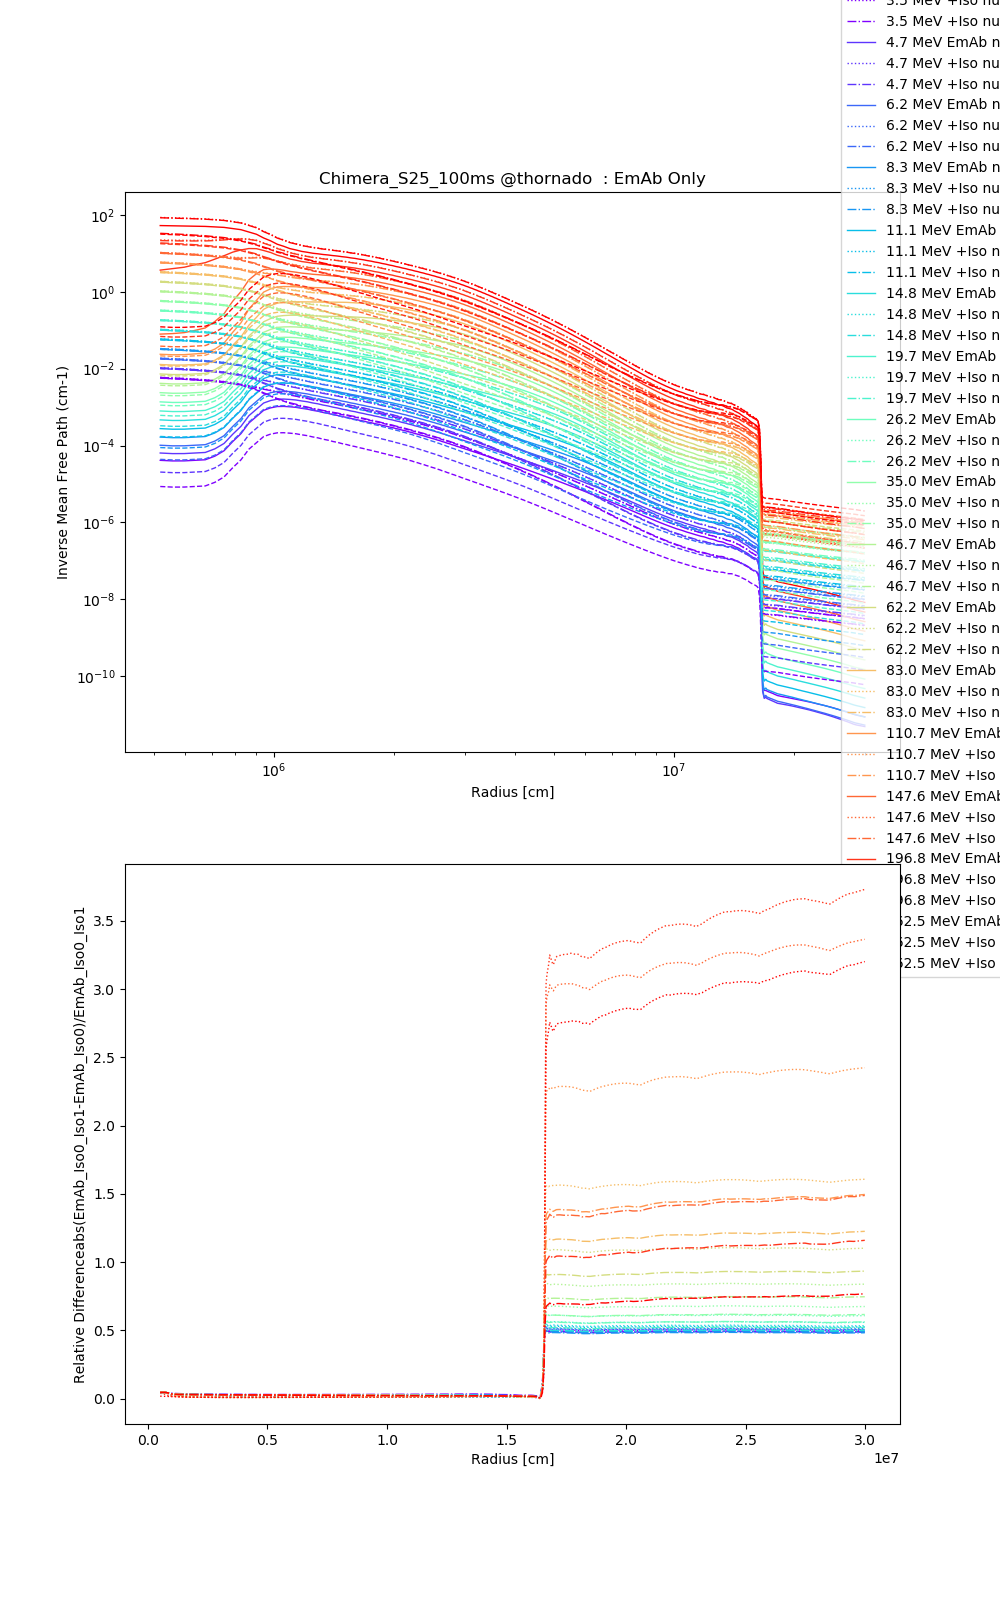

In [8]:
# Lowest energetic & Highest energetic J / H vs Radius
nE = len(Energy)
iEs = [0,1,2, nE-3,nE-2,nE-1]

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

LineType    = ['solid','dashed']
LineType2   = ['dotted','dashdot']
LineType3   = ['dashdot','dashed']
labels = ['nue','nuebar']

colors = cm.rainbow(np.linspace(0, 1, nE))

fig, axs = plt.subplots(2,figsize=(10, 16))
for iS in range(nSpecies):
    for iE in range(nE):
        axs[0].plot(Radius,J_EmAb[iS][:,iE],\
                 linestyle=LineType[iS],color=colors[iE],\
                 linewidth = 1.0, \
                 label= '%.1f MeV EmAb '%(Energy[iE])+labels[iS])
        
        axs[0].plot(Radius,J_EmAb_Iso0_Iso1[iS][:,iE],\
                 linestyle=LineType2[iS],color=colors[iE],\
                 linewidth = 1.0, \
                 label= '%.1f MeV +Iso '%(Energy[iE])+labels[iS])
        
        axs[0].plot(Radius,J_EmAb_Iso0[iS][:,iE],\
                 linestyle=LineType3[iS],color=colors[iE],\
                 linewidth = 1.0, \
                 label= '%.1f MeV +Iso '%(Energy[iE])+labels[iS])
        
        Diff = abs(J_EmAb_Iso0_Iso1[iS][:,iE]-J_EmAb_Iso0[iS][:,iE]) \
               /J_EmAb_Iso0_Iso1[iS][:,iE]
        Diff_label = 'abs(EmAb_Iso0_Iso1-EmAb_Iso0)/EmAb_Iso0_Iso1'
        axs[1].plot(Radius,Diff,\
                 linestyle=LineType2[iS],color=colors[iE],\
                 linewidth = 1.0, \
                 label= '%.1f MeV +Iso '%(Energy[iE])+labels[iS])

axs[0].set_ylabel('Inverse Mean Free Path (cm-1)')
axs[0].set_xlabel('Radius [cm]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].legend(loc='center right', bbox_to_anchor=(1.5, 0.5),
           ncol=2)
axs[0].set_title(ProfileName + ' @thornado  : EmAb Only')
axs[1].set_ylabel('Relative Difference'+Diff_label)
axs[1].set_xlabel('Radius [cm]')
plt.show();